In [1]:
import pycaret
import pandas as pd

train_path = './Datasets/SMOTE_train_all.csv'
f = pd.read_csv(train_path)
f

,ID,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X20,X21,X22,X23,X24,month,day,hour,minute,Y
0,1.000000,41.830000,124.940000,263.220000,300.570000,10.350000,10.390000,10.320000,90.280000,261.760000,...,0.050000,10.350000,7.930000,78.010000,358689.000000,1.00000,1.000000,0.000000,0.000000,3.0
1,2.000000,41.970000,125.300000,262.120000,300.530000,10.330000,10.400000,10.340000,89.500000,268.510000,...,0.000000,9.670000,7.970000,78.080000,339139.000000,1.00000,1.000000,0.000000,6.000000,3.0
2,3.000000,41.900000,125.000000,261.450000,300.290000,10.350000,10.410000,10.330000,89.740000,263.780000,...,0.000000,9.680000,7.980000,79.500000,326082.000000,1.00000,1.000000,0.000000,12.000000,3.0
3,4.000000,42.330000,125.250000,262.120000,298.940000,10.310000,10.410000,10.330000,89.690000,260.090000,...,5.280000,10.920000,7.950000,80.070000,321295.000000,1.00000,1.000000,0.000000,18.000000,3.0
4,5.000000,42.370000,125.030000,262.940000,301.730000,10.330000,10.400000,10.320000,90.200000,262.260000,...,4.600000,11.120000,7.940000,79.960000,339248.000000,1.00000,1.000000,0.000000,24.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40970,7478.411788,42.300316,125.002119,263.833932,299.369821,10.491686,10.404157,10.964743,198.218691,663.420381,...,270.610072,169.140877,7.819333,65.957148,293680.682938,1.58431,14.223633,16.674479,43.482422,5.0
40971,13970.642358,42.850419,125.092725,266.127477,298.775799,9.964894,10.143286,10.893148,195.008997,307.369926,...,41.104184,67.205250,7.185664,79.718473,295625.216148,3.00000,1.237758,11.405606,11.286727,5.0
40972,7877.908363,40.928172,125.148979,259.269768,295.754510,10.528467,10.095110,11.256131,188.646323,714.491426,...,448.375417,70.939368,8.161753,73.008740,300446.284254,2.00000,3.240858,12.255485,27.722575,5.0
40973,2503.432147,41.157220,124.907325,258.790552,297.734334,10.212964,10.581357,11.316179,186.201345,703.726777,...,6.402714,60.411047,8.117286,85.147389,250025.436071,1.00000,11.000000,17.000000,32.592883,5.0


In [2]:
f.Y.value_counts()

4.0    8195
2.0    8195
5.0    8195
3.0    8195
1.0    8195
Name: Y, dtype: int64

In [3]:
from pycaret.classification import *
exp = setup(f, target = 'Y', session_id=123, train_size = 0.9, normalize = True, feature_selection=True,feature_selection_threshold=0.7)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(40975, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
from sklearn.metrics import log_loss
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function               <function log_loss at 0x000001EDAA70E5E0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [5]:
mm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
et,Extra Trees Classifier,0.9040,0.9851,0.9041,0.9033,0.9031,0.8799,0.8802,0.4140,0.6840
rf,Random Forest Classifier,0.8897,0.9816,0.8899,0.8890,0.8888,0.8621,0.8624,0.4798,1.4700
lightgbm,Light Gradient Boosting Machine,0.7888,0.9558,0.7889,0.7937,0.7863,0.7360,0.7383,0.6466,0.6050
knn,K Neighbors Classifier,0.7697,0.9348,0.7702,0.7614,0.7597,0.7122,0.7149,2.1836,1.2880
dt,Decision Tree Classifier,0.7494,0.8433,0.7496,0.7481,0.7485,0.6867,0.6868,8.6569,0.1570
gbc,Gradient Boosting Classifier,0.6197,0.8769,0.6196,0.6195,0.6120,0.5245,0.5277,1.0534,14.3230
ada,Ada Boost Classifier,0.4234,0.7421,0.4235,0.4136,0.4146,0.2793,0.2806,1.5893,0.6210
qda,Quadratic Discriminant Analysis,0.4229,0.7379,0.4234,0.4381,0.4171,0.2789,0.2839,2.1230,0.0290
lr,Logistic Regression,0.3747,0.6804,0.3748,0.3605,0.3613,0.2184,0.2203,1.4513,0.6000
lda,Linear Discriminant Analysis,0.3676,0.6770,0.3678,0.3570,0.3580,0.2096,0.2110,1.4607,0.0600


In [6]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.9018,0.9846,0.9020,0.9011,0.9010,0.8773,0.8775,0.4373
1,0.8994,0.9835,0.8996,0.8987,0.8983,0.8743,0.8746,0.4253
2,0.9040,0.9850,0.9042,0.9032,0.9033,0.8800,0.8802,0.4105
3,0.9046,0.9847,0.9047,0.9040,0.9039,0.8807,0.8809,0.4156
4,0.9078,0.9861,0.9079,0.9068,0.9068,0.8848,0.8850,0.3999
5,0.9089,0.9869,0.9091,0.9081,0.9080,0.8861,0.8864,0.4035
6,0.9029,0.9844,0.9031,0.9022,0.9024,0.8787,0.8787,0.4183
7,0.9072,0.9870,0.9074,0.9065,0.9063,0.8841,0.8843,0.3995
8,0.9048,0.9851,0.9050,0.9042,0.9040,0.8810,0.8813,0.4151
9,0.8980,0.9841,0.8982,0.8977,0.8969,0.8725,0.8730,0.4151


In [7]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [8]:
param_grid={
        'n_estimators': range(30,56,2),
        #'max_features': range(50,401,50),
        'min_samples_leaf': [1, 2,3, 4, 5],
        'min_samples_split': [1, 2, 3],
}
tune_et = tune_model(et, custom_grid = param_grid, optimize = 'LogLoss') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8934,0.9821,0.8936,0.8926,0.8925,0.8668,0.8671,0.4953
1,0.8948,0.9817,0.8950,0.8937,0.8936,0.8685,0.8688,0.4789
2,0.9008,0.9828,0.9010,0.9001,0.9003,0.8760,0.8760,0.4495
3,0.9008,0.9823,0.9010,0.8998,0.8998,0.8760,0.8762,0.4781
4,0.8997,0.9840,0.8998,0.8990,0.8988,0.8746,0.8749,0.4457
5,0.9037,0.9845,0.9039,0.9031,0.9029,0.8797,0.8799,0.4251
6,0.9013,0.9834,0.9014,0.9006,0.9008,0.8766,0.8767,0.4659
7,0.8996,0.9850,0.8998,0.8988,0.8987,0.8746,0.8748,0.4206
8,0.8948,0.9828,0.8949,0.8945,0.8940,0.8685,0.8688,0.4388
9,0.8899,0.9822,0.8900,0.8890,0.8887,0.8624,0.8627,0.4417


In [9]:
tune_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=38, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [10]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8850,0.9815,0.8852,0.8843,0.8841,0.8563,0.8566,0.4856
1,0.8815,0.9797,0.8817,0.8806,0.8798,0.8519,0.8525,0.5001
2,0.8921,0.9818,0.8923,0.8918,0.8917,0.8651,0.8652,0.4781
3,0.8948,0.9808,0.8950,0.8943,0.8941,0.8685,0.8687,0.4816
4,0.8934,0.9822,0.8936,0.8925,0.8925,0.8668,0.8670,0.4714
5,0.8999,0.9830,0.9001,0.8994,0.8990,0.8749,0.8753,0.4705
6,0.8853,0.9803,0.8855,0.8848,0.8848,0.8566,0.8567,0.4832
7,0.8959,0.9843,0.8960,0.8951,0.8948,0.8698,0.8702,0.4645
8,0.8877,0.9819,0.8879,0.8871,0.8868,0.8596,0.8600,0.4813
9,0.8815,0.9802,0.8816,0.8805,0.8802,0.8518,0.8522,0.4817


In [11]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [12]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
param_grid={
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
        'max_depth': max_depth,
        #'max_features': range(50,401,50),
        'min_samples_leaf': [1, 2,3, 4, 5],
        'min_samples_split': [1, 2, 3],
}

In [13]:
tune_rf = tune_model(rf, custom_grid = param_grid, optimize = 'F1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8812,0.9806,0.8814,0.8807,0.8803,0.8515,0.8519,0.5174
1,0.8815,0.9785,0.8817,0.8805,0.8800,0.8519,0.8524,0.5319
2,0.8880,0.9808,0.8882,0.8873,0.8873,0.8600,0.8602,0.5209
3,0.8888,0.9797,0.8890,0.8882,0.8879,0.8610,0.8613,0.5211
4,0.8905,0.9813,0.8906,0.8899,0.8896,0.8631,0.8634,0.5112
5,0.8913,0.9824,0.8915,0.8908,0.8901,0.8641,0.8645,0.5150
6,0.8783,0.9788,0.8784,0.8777,0.8776,0.8478,0.8480,0.5262
7,0.8921,0.9833,0.8922,0.8914,0.8910,0.8651,0.8654,0.5052
8,0.8769,0.9811,0.8771,0.8760,0.8758,0.8461,0.8464,0.5208
9,0.8777,0.9794,0.8778,0.8770,0.8765,0.8471,0.8475,0.5202


In [14]:
tune_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [21]:
blend_soft = blend_models(estimator_list = [et, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8967,0.9843,0.8969,0.8960,0.8958,0.8709,0.8711,0.4492
1,0.8926,0.9831,0.8928,0.8919,0.8912,0.8658,0.8663,0.4540
2,0.9051,0.9847,0.9053,0.9047,0.9046,0.8814,0.8815,0.4397
3,0.9048,0.9841,0.9050,0.9044,0.9041,0.8810,0.8813,0.4443
4,0.9029,0.9854,0.9031,0.9021,0.9020,0.8787,0.8789,0.4313
5,0.9105,0.9863,0.9107,0.9098,0.9096,0.8882,0.8885,0.4327
6,0.9002,0.9837,0.9004,0.8996,0.8997,0.8753,0.8754,0.4464
7,0.9051,0.9869,0.9052,0.9045,0.9041,0.8813,0.8817,0.4281
8,0.8983,0.9849,0.8985,0.8978,0.8973,0.8729,0.8732,0.4436
9,0.8964,0.9837,0.8965,0.8957,0.8953,0.8705,0.8709,0.4436


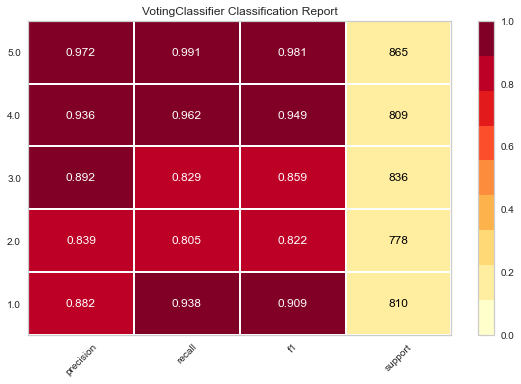

In [22]:
plot_model(blend_soft, plot = 'class_report')

In [23]:
final = finalize_model(blend_soft)

In [24]:
save_model(final, model_name='best-model')
loaded_bestmodel = load_model('best-model')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [25]:
test_path = './Datasets/test.csv'
t_f = pd.read_csv(test_path)
rf_pred = loaded_bestmodel.predict_proba(t_f)

In [26]:
IDs = list(range(1,rf_pred.shape[0]+1))

ID_arr = np.array(IDs).reshape(-1,1)
combine = np.concatenate((ID_arr, rf_pred), axis=1)
import pandas as pd
df = pd.DataFrame(combine, columns = ['ID','C1','C2','C3','C4','C5'])

df.to_csv('out_blend_soft.csv',index=False)